RUNNING THE LIBRARIES RELATED TO THE MODEL


In [0]:

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
import nibabel as nib
import time
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.utils import to_categorical
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from matplotlib import pyplot as plt
import pickle as pk
from PIL import Image
from PIL import ImageEnhance
import cv2
import glob
%matplotlib inline 

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


READING THE INPUT IMAGES RELATED TO SEGMENTATION (ISIC 2018)

In [0]:
#resizing images of ISIC_2018 for unet
#path = '/content/gdrive/My Drive/DATA SET/ISIC2018_Task1-2_Training_Input/ISIC_0000043.jpg'
path = '/content/drive/My Drive/DATA SET/ISIC2018_Task1-2_Training_Input/*.jpg'
image_list_input = []
image_list_output = []
c = 0
for filename in glob.glob(path):
  '''
  img = Image.open(filename)
  
  #plt.imshow(img, cmap = 'gray')
  #img = ImageEnhance.Contrast(img)
  img = img.resize((512,512),Image.ANTIALIAS)
  #img = cv2.resize(img,(512,512),interpolation = cv2.INTER_AREA)
  #img = cv2.equalizeHist(img)
  #img = img/255
  #img = cv2.pow(img,1.6)
  '''
  
  img = Image.open(filename)
  img = img.resize((512,512),Image.ANTIALIAS)
  image_array = np.array(img)
  image_list_input = image_list_input + [image_array]
  '''
  img = Image.open('/content/drive/My Drive/DATA SET/ISIC2018_Task1_Training_GroundTruth/'+filename[-16:-4]+'_segmentation.png')
  img = img.resize((512,512), Image.ANTIALIAS)
  image_array = np.array(img)
  image_list_output = image_list_output + [image_array]
  '''
  c = c + 1  
  print(c)



pk.dump(image_list_input, open('/content/drive/My Drive/DATA SET/dump_input_color.pkl','wb'))
#pk.dump(image_list_output, open('/content/drive/My Drive/DATA SET/dump_output.pkl','wb'))


 

In [0]:
# converting 3 list output channel to array
image_array_output = np.array(arr)
print(image_array_output.shape)

LOADING THE DATASET, OUTPUT FROM PICKLE FILES 

In [0]:
image_array_input = pk.load( open('/content/drive/My Drive/DATA SET/dump_input.pkl','rb'))
image_array_input = np.array(image_array_input)
image_array_input = image_array_input.reshape(image_array_input.shape[0],image_array_input.shape[1],image_array_input.shape[2],1)

image_array_output = pk.load( open('/content/drive/My Drive/DATA SET/dump_output.pkl','rb'))
image_array_output = np.array(image_array_output)
image_array_output[image_array_output != 0] = 1
image_array_output = image_array_output.reshape(image_array_output.shape[0],image_array_output.shape[1],image_array_output.shape[2],1)

pk.dump(image_array_output, open('/content/drive/My Drive/DATA SET/image_array_output.pkl', 'wb'))

print(image_array_input.shape)
print(image_array_output.shape)

(2594, 512, 512, 1)
(2594, 512, 512, 1)


UNET MODEL

In [0]:
image_input_array_contrast = image_input_array_contrast.reshape(image_input_array_contrast.shape[0],512,512,1)
#Unet Model
#def unet(pretrained_weights = None,input_size = (256,256,1)):
pretrained_weights = None
#seg = np.load(data_path1+"seg1image.npy")
#flair = np.load(data_path1+"flair1image.npy")
pretrained_weights = None
input_size = (512,512,1)
inputs = Input(input_size)

conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = BatchNormalization()(conv1)
conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = BatchNormalization()(conv2)
conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = BatchNormalization()(conv3)
conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
conv3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = BatchNormalization()(conv4)
conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
conv4 = BatchNormalization()(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = BatchNormalization()(conv5)
conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
conv5 = BatchNormalization()(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
up6 = BatchNormalization()(up6)
merge6 = concatenate([drop4,up6], axis = 3)
merge6 = BatchNormalization()(merge6)
conv6 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = BatchNormalization()(conv6)
conv6 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
conv6 = BatchNormalization()(conv6)

up7 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
up7 = BatchNormalization()(up7)
merge7 = concatenate([conv3,up7], axis = 3)
merge7 = BatchNormalization()(merge7)
conv7 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = BatchNormalization()(conv7)
conv7 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
conv7 = BatchNormalization()(conv7)

up8 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = BatchNormalization()(conv8)
conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
conv8 = BatchNormalization()(conv8)

up9 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = BatchNormalization()(conv9)
conv9 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = BatchNormalization()(conv9)
conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = BatchNormalization()(conv9)
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

model = Model(input = inputs, output = conv10)

checkpoint = ModelCheckpoint(filepath = '/content/drive/My Drive/DATA SET/model_mean.hdf5',monitor = 'val_acc',verbose = 0, save_best_only = 'True', mode = 'auto', save_weights_only = 'False')
model.compile(optimizer = Adam(lr = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(image_input_array_contrast,image_array_output,batch_size=10,epochs = 25,validation_split=0.3,verbose=1, callbacks=[checkpoint])
#model.summary()

if(pretrained_weights):
  model.load_weights(pretrained_weights)

   # return model

CODE FOR COPYING INPUT IMAGES(ISIC 2019) INTO RESPECTIVE FOLDERS

In [0]:
import csv
from shutil import copyfile
dictionaryOfLabels = {}
count  = 0
c1 = 0
with open('/content/drive/My Drive/DATA SET/isic2019/labels/ISIC_2019_Training_GroundTruth.csv') as csvFile:
  reader = csv.reader(csvFile)
  for row in reader:
    if row[8] == '1.0':
      print(row)
      copyfile( '/content/drive/My Drive/DATA SET/isic2019/images/official/' + row[0]+'.jpg', '/content/drive/My Drive/Individual datasets/SquamousCellCarcinoma/'+ row[0]+'.jpg')

    '''
    for j in range(1,len(row)):
      if row[j] == '1.0' and j == 1:
        copyfile( '/content/drive/My Drive/DATA SET/isic2019/images/official/' + row[0]+'.jpg', '/content/drive/My Drive/Individual datasets/Melanoma/'+ row[0]+'.jpg')
      elif row[j] == '1.0' and j == 2:
        copyfile( '/content/drive/My Drive/DATA SET/isic2019/images/official/' + row[0]+'.jpg', '/content/drive/My Drive/Individual datasets/MelanocyticNevus/'+ row[0]+'.jpg')
      elif row[j] == '1.0' and j == 3:
        copyfile( '/content/drive/My Drive/DATA SET/isic2019/images/official/' + row[0]+'.jpg', '/content/drive/My Drive/Individual datasets/BasalCellCarcinoma/'+ row[0]+'.jpg')
      elif row[j] == '1.0' and j == 4:
        copyfile( '/content/drive/My Drive/DATA SET/isic2019/images/official/' + row[0]+'.jpg', '/content/drive/My Drive/Individual datasets/ActinicKeratosis/'+ row[0]+'.jpg')
      elif row[j] == '1.0' and j == 5:
        copyfile( '/content/drive/My Drive/DATA SET/isic2019/images/official/' + row[0]+'.jpg', '/content/drive/My Drive/Individual datasets/BenignKeratosis/'+ row[0]+'.jpg')
      elif row[j] == '1.0' and j == 6:
        copyfile( '/content/drive/My Drive/DATA SET/isic2019/images/official/' + row[0]+'.jpg', '/content/drive/My Drive/Individual datasets/Dibrofitoma/'+ row[0]+'.jpg')
      elif row[j] == '1.0' and j == 7:
        copyfile( '/content/drive/My Drive/DATA SET/isic2019/images/official/' + row[0]+'.jpg', '/content/drive/My Drive/Individual datasets/VascularLesion/'+ row[0]+'.jpg')
      elif row[j] == '1.0' and j == 8:
        copyfile( '/content/drive/My Drive/DATA SET/isic2019/images/official/' + row[0]+'.jpg', '/content/drive/My Drive/Individual datasets/SquamousCellCarcinoma/'+ row[0]+'.jpg')
      elif row[j] == '1.0' and j == 9:
        copyfile( '/content/drive/My Drive/DATA SET/isic2019/images/official/' + row[0]+'.jpg', '/content/drive/My Drive/Individual datasets/Unknown/'+ row[0]+'.jpg')
    '''
    c1 =  c1 + 1  
    print(c1)
 
    

CREATING THE STRUCTURE OF THE MODEL FOR TESTING THE MDOEL ACCURACY

In [0]:
# This is how your model looks
input_size = (512,512,1)
inputs = Input(input_size)

conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = BatchNormalization()(conv1)
conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = BatchNormalization()(conv2)
conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = BatchNormalization()(conv3)
conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
conv3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = BatchNormalization()(conv4)
conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
conv4 = BatchNormalization()(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = BatchNormalization()(conv5)
conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
conv5 = BatchNormalization()(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
up6 = BatchNormalization()(up6)
merge6 = concatenate([drop4,up6], axis = 3)
merge6 = BatchNormalization()(merge6)
conv6 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = BatchNormalization()(conv6)
conv6 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
conv6 = BatchNormalization()(conv6)

up7 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
up7 = BatchNormalization()(up7)
merge7 = concatenate([conv3,up7], axis = 3)
merge7 = BatchNormalization()(merge7)
conv7 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = BatchNormalization()(conv7)
conv7 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
conv7 = BatchNormalization()(conv7)

up8 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = BatchNormalization()(conv8)
conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
conv8 = BatchNormalization()(conv8)

up9 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = BatchNormalization()(conv9)
conv9 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = BatchNormalization()(conv9)
conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = BatchNormalization()(conv9)
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

model = Model(input = inputs, output = conv10)

In [0]:
model.load_weights('/content/drive/My Drive/DATA SET/model_mean.hdf5')

(512, 512)


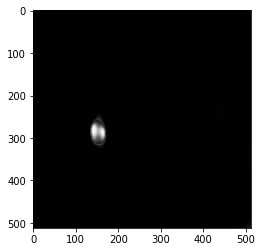

In [0]:
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 

# Vectorize the function to apply it to each value in the Numpy array. 

'''
r1 = 40
s1 = 30
r2 = 105
s2 = 60
'''
path = '/content/drive/My Drive/DATA SET/isic2019/images/official/ISIC_0001186_downsampled.jpg'
#path = '/content/drive/My Drive/DATA SET/ISIC2018_Task1-2_Training_Input/ISIC_0000058_downsampled.jpg'
img = Image.open(path)
img = img.resize((512,512),Image.ANTIALIAS)
img = np.array(img)

mean = np.mean(img)
pixelVal_vec = np.vectorize(pixelVal) 

r1 = 20
s1 = 15
r2 = mean + 30 
s2 = mean + 60


contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 
  
# Save edited image  
cv2.imwrite('/content/drive/My Drive/DATA SET/contrast_stretch.jpg',contrast_stretched) 
#plt.imshow('/content/drive/My Drive/DATA SET/contrast_stretch.jpg', cmap = 'gray')
img = cv2.imread('/content/drive/My Drive/DATA SET/contrast_stretch.jpg',cv2.IMREAD_GRAYSCALE)

#print(img)

img = np.array(img)
print(img.shape)
img = img.reshape(1,512,512,1)
ans = model.predict(img)
ans = ans.reshape(512,512)
 
#print(np.mean(img))
plt.imshow(ans,cmap = 'gray')
#print(img)

LOADING THE INPUT DATA(2018) VALUES FOR APPLYING PIECE WISE LINEAR TRANFORMATION

In [0]:
#reading the color values
image_array_input_color = pk.load(open('/content/drive/My Drive/DATA SET/dump_input_color.pkl','rb'))
image_array_input_color = np.array(image_array_input_color)
print(image_array_input_color.shape) 

(2594, 512, 512, 3)


In [0]:
#Value for increasing the intensity of color images then converting them back to gray scale.
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
image_input_list_contrast = []
c = 0

# Vectorize the function to apply it to each value in the Numpy array. 


pixelVal_vec = np.vectorize(pixelVal) 

for i in range(len(classification_input_images)):
  img = classification_input_images[i]
  # Open the image. 
  #img = cv2.imread(filename) 
  #print(type(img)) 
  # Define parameters.
  mean = np.mean(img) 
  r1 = 20
  s1 = 15
  r2 = mean + 30 
  s2 = mean + 60
  
  # Apply contrast stretching. 
  contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 
    
  # Save edited image. 
  cv2.imwrite('/content/drive/My Drive/DATA SET/contrast_stretch.jpg', contrast_stretched) 
  #plt.imshow('/content/drive/My Drive/DATA SET/contrast_stretch.jpg', cmap = 'gray')
  img = cv2.imread('/content/drive/My Drive/DATA SET/contrast_stretch.jpg',cv2.IMREAD_GRAYSCALE)
  img = np.array(img)
  image_input_list_contrast = image_input_list_contrast + [img]
  c = c + 1
  print(c)

pk.dump(image_input_list_contrast, open('/content/drive/My Drive/DATA SET/classication_segmentation_input.pkl','wb'))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
classification_input_2 = pk.load(open('/content/drive/My Drive/DATA SET/classication_segmentation_input.pkl','rb'))
classification_input_2 = np.array(classification_input_2)

CONVERTING 1 CHANNEL OUTPUT IMAGES TO 3 CHANNEL OUTPUT IMAGES

In [0]:
# Output Image channel is changed from 1 to 3

image_array_output = pk.load( open('/content/drive/My Drive/DATA SET/image_array_output.pkl', 'rb'))
image_array_output = image_array_output.reshape(image_array_output.shape[0],512,512)
dim = np.zeros((512,512))
arr = []
for i in range(len(image_array_output)):
  x = np.stack((image_array_output[i],dim,dim), axis = 2)
  arr.append(x)
pk.dump(arr,open('/content/drive/My Drive/DATA SET/dump_output_color.pkl','wb') )

CLASSIFICATION MODEL FOR DERMASCOPIC IMAGES

In [0]:
import csv
classification_input_images = []
classification_output_images = []
dictionaryOfLabels = {}
with open('/content/drive/My Drive/DATA SET/isic2019/labels/ISIC_2019_Training_GroundTruth.csv') as csvFile:
  reader = csv.reader(csvFile)
  for row in reader:
    for j in range(0,len(row)):
      if row[j] == '1.0':
        dictionaryOfLabels[row[0]] = j-1  

In [0]:
for i in glob.glob('/content/drive/My Drive/Individual datasets/*'):
  count = 0
  for filename in glob.glob(i + '/*.jpg'):
    img = Image.open(filename)
    img = img.resize((512,512),Image.ANTIALIAS)
    img = np.array(img)
    print(img.shape)
    classification_input_images  = classification_input_images + [img]
    filename = str(filename.split('/')[-1])
    filename = filename.split('.')[0]
    filename = filename.split(' ')[0]
    classification_output_images.append(dictionaryOfLabels[filename])
    #print(filename)
    count = count + 1
    print(count)
    if count==239:
      break

  
pk.dump(classification_input_images, open('/content/drive/My Drive/Individual datasets/classification_input_2019_239_images.pkl', 'wb'))  


In [0]:
pk.dump(classification_output_images, open('/content/drive/My Drive/Individual datasets/classification_output_2019_239_labels.pkl', 'wb'))  


In [0]:
print(classification_input_images[0].shape)

(512, 512, 3)


In [0]:
classification_input_images[0].shape

(512, 512, 3)

In [0]:
imageArray = np.array(classification_input_images)
print(imageArray.ndim)

y = [to_categorical(classification_output_images,8)]

classification_input_2 = classification_input_2.reshape(1912,512,512,1)


4


In [0]:
model_1_input = Input(shape=(512,512,3))
model_1_conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal' ) (model_1_input)
model_1_conv1 = BatchNormalization()(model_1_conv1)
model_1_conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(model_1_conv1)
model_1_conv1 = BatchNormalization()(model_1_conv1)
model_1_pool1 = MaxPooling2D(pool_size=(2, 2))(model_1_conv1)
model_1_out = Dense(128, activation='relu')(model_1_pool1)
model1 = Model(model_1_input, model_1_out)

model_2_input = Input(shape=(512,512,1))
model_2_conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal' ) (model_2_input)
model_2_conv1 = BatchNormalization()(model_2_conv1)
model_2_conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(model_2_conv1)
model_2_conv1 = BatchNormalization()(model_2_conv1)
model_2_pool1 = MaxPooling2D(pool_size=(2, 2))(model_2_conv1)
model_2_out = Dense(128, activation='relu')(model_2_pool1)
model2 = Model(model_2_input, model_2_out)

concatenated = concatenate([model_1_out, model_2_out])
out = Dense(128, activation = 'relu' )(concatenated)
out = Dense(8, activation = 'softmax')(out)
merged_model = Model([model_1_input, model_2_input], out)
merged_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
checkpoint = ModelCheckpoint('/content/drive/My Drive/DATA SET/model_classification.hdf5', monitor = 'val_acc', save_best_only = True, verbose = 0)

merged_model.fit([imageArray,classification_input_2], x ,batch_size = 5, epochs = 20, validation_split = 0.2, shuffle = True )


In [0]:
print(len(y))
x = np.array(y)
x = x.reshape(1912,8)
x.shape
x[0]

1


array([0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)